In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df = pd.read_csv("train (1).csv")
df

,id,landmark_id
0,img_0000,1000
1,img_0001,1000
2,img_0002,1000
3,img_0003,1000
4,img_0004,1000
...,...,...
195,img_0195,1009
196,img_0196,1009
197,img_0197,1009
198,img_0198,1009


In [ ]:
print(df.columns)

Index(['id', 'landmark_id'], dtype='object')


In [ ]:
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [ ]:
num_classes

10

In [ ]:
num_data

200

In [ ]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()
data.tail()

,landmark_id,count
5,1005,20
6,1006,20
7,1007,20
8,1008,20
9,1009,20


In [ ]:
data.columns=["index","landmark_id"]
data["index"].describe()

,index
count,10.00000
mean,1004.50000
std,3.02765
min,1000.00000
25%,1002.25000
50%,1004.50000
75%,1006.75000
max,1009.00000


(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.  ,  0.58,  1.16,  1.74,  2.32,  2.9 ,  3.48,  4.06,  4.64,
         5.22,  5.8 ,  6.38,  6.96,  7.54,  8.12,  8.7 ,  9.28,  9.86,
        10.44, 11.02, 11.6 , 12.18, 12.76, 13.34, 13.92, 14.5 , 15.08,
        15.66, 16.24, 16.82, 17.4 , 17.98, 18.56, 19.14, 19.72, 20.3 ,
        20.88, 21.46, 22.04, 22.62, 23.2 , 23.78, 24.36, 24.94, 25.52,
        26.1 , 26.68, 27.26, 27.84, 28.42, 29.  , 29.58, 30.16, 30.74,
        

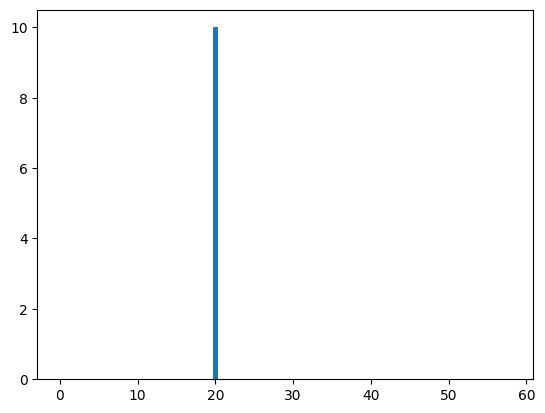

In [ ]:
plt.hist(data["landmark_id"],100,range= (0,58), label="test")

In [ ]:
data["landmark_id"].between(0,5).sum()

np.int64(0)

In [ ]:
data = df['landmark_id'].value_counts().reset_index()
data.columns = ['landmark_id', 'count']

In [ ]:
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"

source_model = VGG19(weights=None, include_top=False, input_shape=(224, 224, 3))
drop_layer = Dropout(0.5)
num_classes = 10  # Set based on your dataset

# Build custom model from VGG19
# Build custom model from VGG19
model = Sequential()
for i, layer in enumerate(source_model.layers[:-1]):
    model.add(layer)
    if i == 3:  # just after a few conv layers (choose any safe index)
        model.add(BatchNormalization())

# Add classification head
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [2]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

def get_image_from_number(index, dataframe):
    img_id = dataframe.iloc[index]['id']
    le = LabelEncoder()
    df['label_encoded'] = le.fit_transform(df['landmark_id'])
    label = dataframe.iloc[index]['label_encoded']
    path = f"/content/drive/MyDrive/images/{img_id}.jpg"
    try:
        img = Image.open(path).convert("RGB")
        img = np.array(img)
        return img, label
    except:
        # return black image on failure
        return np.zeros((224, 224, 3)), label

def get_batch(dataframe, start, batch_size):
    image_array, label_array = [], []
    end_img = min(start + batch_size, len(dataframe))

    for idx in range(start, end_img):
        im, label = get_image_from_number(idx, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)

    return np.array(image_array), np.array(label_array)


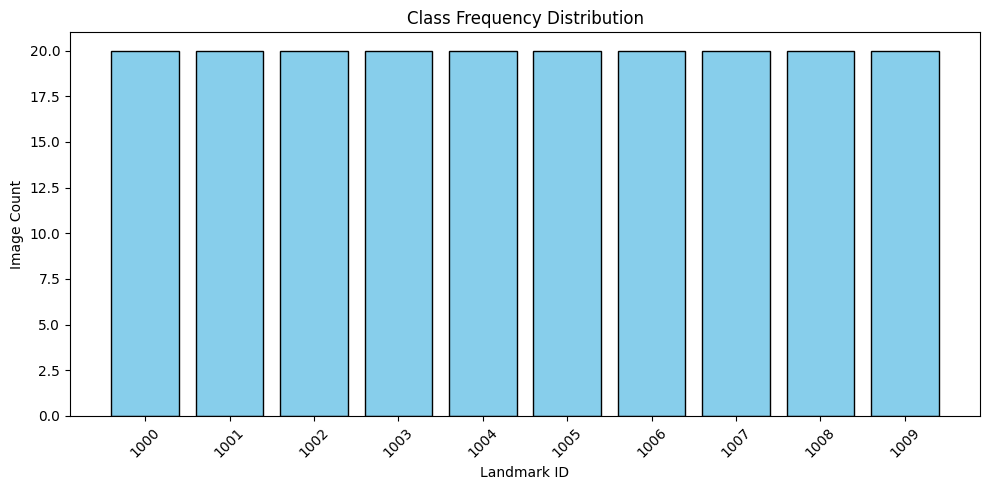

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(data['landmark_id'].astype(str), data['count'], color='skyblue', edgecolor='black')
plt.title("Class Frequency Distribution")
plt.xlabel("Landmark ID")
plt.ylabel("Image Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()